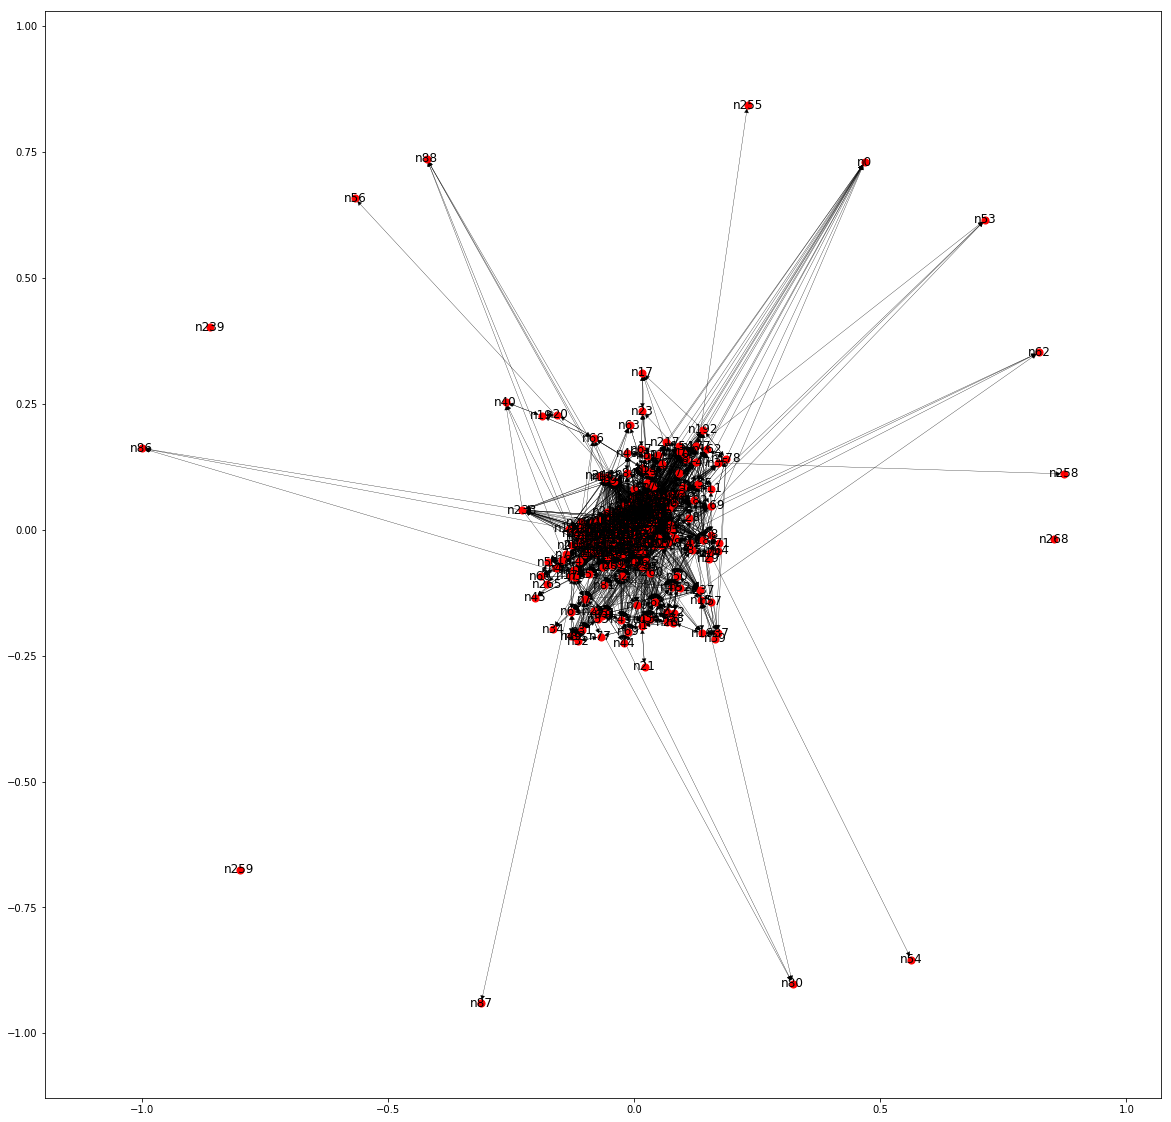

In [84]:
import numpy as np 
import networkx as nx 
import matplotlib.pyplot as plt 
from mpl_toolkits.axes_grid1 import make_axes_locatable
import scipy.io
from scipy.sparse import csr_matrix
%matplotlib inline


#################
#load graph
#################
G = nx.read_graphml("c.elegans_neural.male_1.graphml")
adj_G = nx.adjacency_matrix(G)
# scipy.io.savemat("mouse.mat",mdict={'adj_G':adj_G.todense()}) #convert to matlab .mat file
animal = "c elegans"

#################
#convert to undirected graph, and watts strogatz graph
#################
UG = G.to_undirected(G)
rgl_latt=nx.watts_strogatz_graph(np.size(UG.nodes),np.int64(np.ceil(np.float64(np.size(UG.edges))/np.size(cc_values))),0)
plt.figure(figsize=(20,20))
nx.draw_networkx(rgl_latt,node_size=50,style='dashed',width=0.3,)
plt.savefig("watts_strogatz_p_0_"+animal+".eps")
L0 = nx.average_shortest_path_length(rgl_latt)
C0 = nx.average_clustering(rgl_latt)



#################
#plot graph
#################
plt.figure(figsize=(20,20))
nx.draw_networkx(G,node_size=50,style='dashed',width=0.3,pos=nx.spring_layout(G))
plt.savefig(animal+'graph.eps')


#################
#plot adjacency matrix
#################
plt.figure(figsize=(8,8))
plt.matshow(adj_G.todense(),cmap = 'Blues')
plt.title("adjacency matrix of "+animal)
plt.savefig("./adjacency matrix of "+animal+".eps")


#################
#plot degree distribution
#################
in_degrees = dict(G.in_degree()) 
in_values = sorted(set(in_degrees.values()))
in_hist = [in_degrees.values().count(x) for x in in_values]
out_degrees = dict(G.out_degree()) 
out_values = sorted(set(out_degrees.values()))
out_hist = [out_degrees.values().count(x) for x in out_values]
plt.figure(figsize=(10,5))
plt.plot(in_values,in_hist,'bv-',label="inward degree") 
plt.plot(out_values,out_hist,'ro-',label="outward degree")
plt.xlabel('Degree')
plt.ylabel('Number of nodes')
plt.legend()
plt.title(animal+' degree distribution') 
plt.savefig(animal+'_degree_distribution.pdf') 


################
#plot distance matrix
################
dis_ma = nx.floyd_warshall_numpy(UG)
plt.figure(figsize=(6,6))
ax = plt.gca()
cmap = plt.cm.jet
cmap.set_bad('white',1.)
im = ax.imshow(dis_ma/L0,cmap =cmap)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)
plt.title("L(p)/L(0)={0:1.3f}".format(np.mean(dis_ma)/L0)+", distance matrix of "+animal+",scaled by L(0)",loc = 'right')
plt.savefig("./distance matrix of "+animal+".eps")


################
#plot clustering coefficient, convert to undirected graph
################
cc = nx.clustering(UG)
cc_values = cc.values()
plt.figure(figsize=(8,8))
plt.scatter(np.arange(np.size(cc_values)),cc_values,label = 'clustering coeffi')
plt.plot([0,np.size(cc_values)],[nx.average_clustering(UG),nx.average_clustering(UG)],label = 'global clustering coeffi',c ='r')
plt.legend()
plt.title("C(p)/C(0)={0:2.3f}".format(nx.average_clustering(UG)/C0)+", clustering coefficient of "+animal,loc = 'right')
plt.savefig("./cc of "+animal+".eps")

plt.show()